In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
dataset = pd.read_csv("dataset.csv")

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [57]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [58]:
dataset['G3'].value_counts()

11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
0      15
18     15
7      10
6       3
19      2
5       1
1       1
Name: G3, dtype: int64

In [59]:
dataset.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [60]:
totalColumns = dataset.columns

In [61]:
dataset['Fjob'].value_counts()

other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64

In [62]:
num_list = dataset._get_numeric_data().columns
cat_col = []

In [63]:
for col in totalColumns:
    if col not in num_list:
        cat_col.append(col)

In [77]:
cat_col

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [65]:
a = list(dataset['school'].value_counts())

In [66]:
len(a)>2

False

In [67]:
lab_encode_li = []
one_hot_encode_li = []

In [68]:
for col in cat_col:
    a = list(dataset[col].value_counts())
    if(len(a)>2):
        one_hot_encode_li.append(col)
    else:
        lab_encode_li.append(col)

In [69]:
one_hot_encode_li

['Mjob', 'Fjob', 'reason', 'guardian']

In [70]:
lab_encode_li

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in lab_encode_li:
    dataset[col] = le.fit_transform(dataset[col])

In [72]:
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,1,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,1,0,1,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,1,1,1,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
totalColumns = list(totalColumns)

In [82]:
lis_index_OHE = []
for col in one_hot_encode_li:
    lis_index_OHE.append(totalColumns.index(col))

In [83]:
lis_index_OHE

[8, 9, 10, 11]

In [98]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [99]:
X

array([[0, 0, 18, ..., 4, 0, 11],
       [0, 0, 17, ..., 2, 9, 11],
       [0, 0, 15, ..., 6, 12, 13],
       ...,
       [1, 0, 18, ..., 6, 11, 12],
       [1, 1, 17, ..., 6, 10, 10],
       [1, 1, 18, ..., 4, 10, 11]], dtype=object)

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), lis_index_OHE)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [101]:
X[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0, 0, 18, 1, 0, 0, 4, 4, 2, 2, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 4, 3, 4, 1, 1, 3, 4, 0, 11], dtype=object)

In [102]:
dataset['reason'].value_counts()

course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 7)

In [104]:
len(X),len(y)

(649, 649)

# building a SVR model

In [110]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
c = [0.01,0.1]
gamma = ['scale', 'auto']
epsilon = [0.01,0.01,1]
shrinking = [True,False]
svm_grid = {'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}
svm_search = RandomizedSearchCV(SVR(),svm_grid,cv=3,return_train_score=True,verbose=1)
svm_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.3s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'epsilon': [0.01, 0.01, 1],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring=None, verbose=1)

In [111]:
svm_search.best_params_

{'shrinking': False,
 'kernel': 'linear',
 'gamma': 'scale',
 'epsilon': 0.01,
 'C': 0.1}

In [112]:
svm_search.best_score_

0.8148460709574235

In [113]:
y_pred = svm_search.predict(X_test)

In [116]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [117]:
score

0.8705258569958911

In [118]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

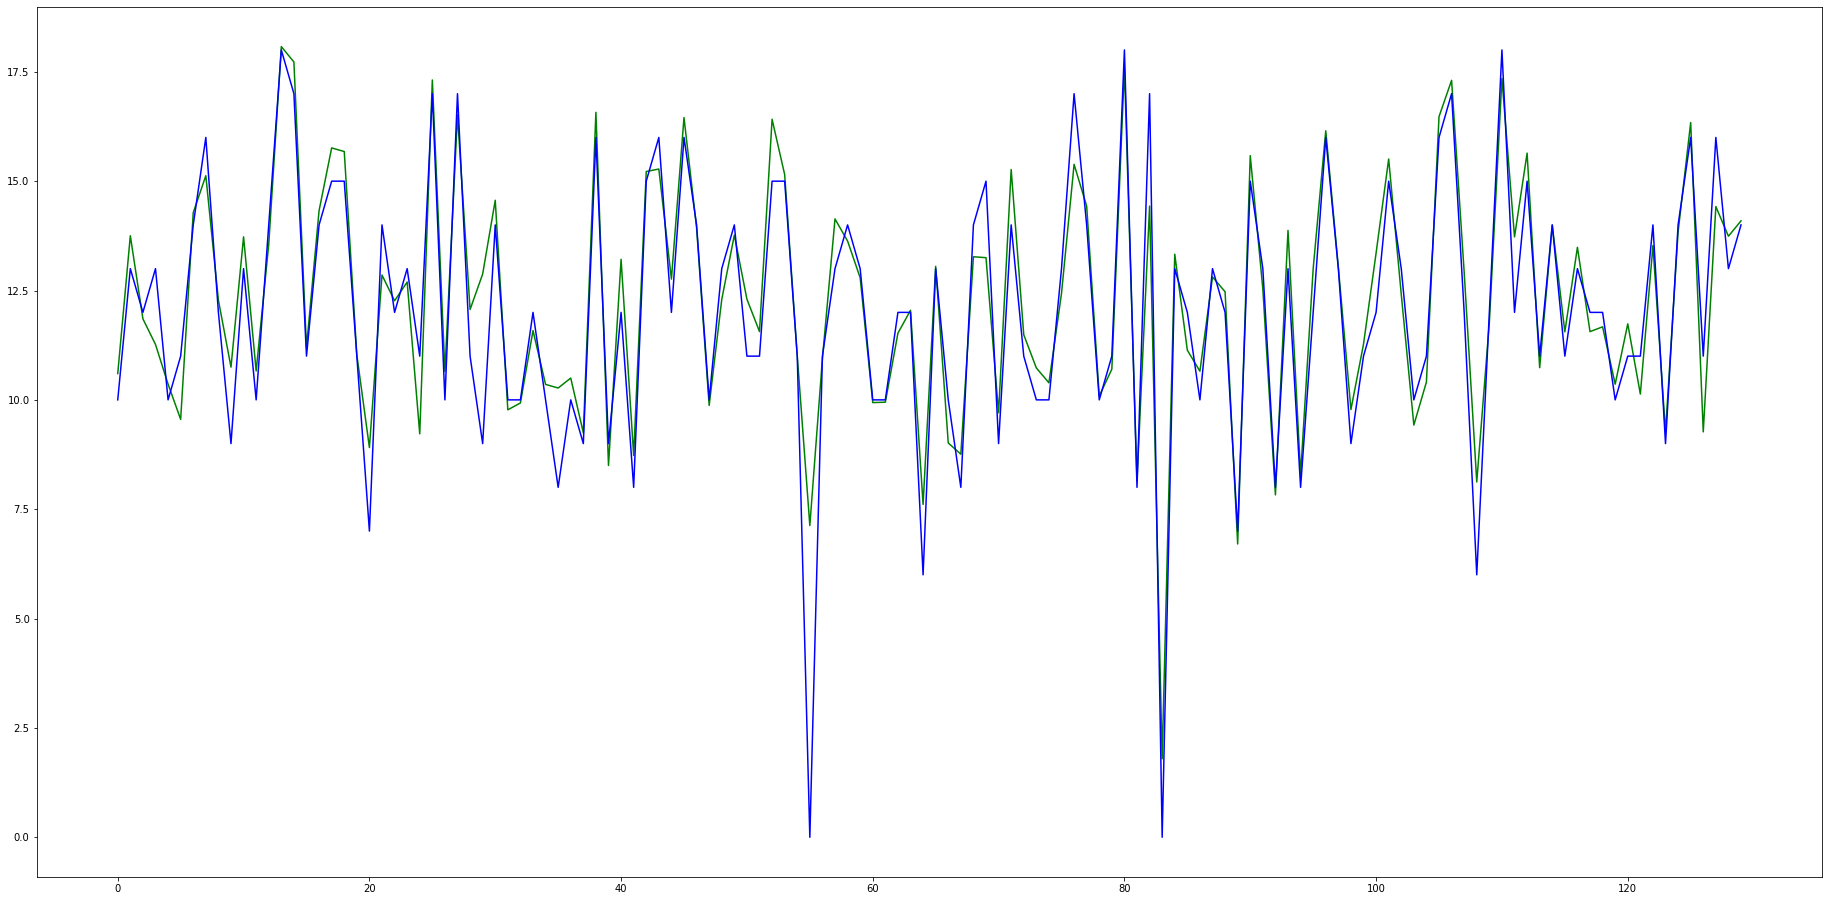

In [123]:
plt.figure(figsize=(32,16))
plt.plot(y_pred,color='green')
plt.plot(y_test,color='blue')

In [121]:
len(y_pred)

130